# Polynomial Linear Regression

In keeping with the idea of the linear regression, we still have a response variable that has some dependency on a predictor variable. The exception is with the Polynomial Regression, as the name implies, is with the relationship between the response variable and the predictors is that rather than having  just the $b_{1}x_{1}$ term, we have a polynomial (different powers of $x_{1}$:

$
y=b_{0}+b_{1}x_{1}+b_{2}x_{1}^{2}+\ldots+b_{n}x_{1}^{n}
$

An imminent question regarding the flavor of regression this falls under is "how is this a *linear* regression model if the dependency is of polynomial order?" A fine question indeed. Linear regression models are not referred to as "linear" based on their order of dependent variables; rather, they are refering to the *coefficients*, $b$. Yes, $y$ is a function of $x$, but the question is "can y be expressed as a *linear combination of the coefficients*? This makes as these are the real unknowns in machine learning (think about it, we know the $x$'s: they're in our data sets!). Once we know the coefficients, we can then plug in the $x$'s and predict the response, $y$.

## The Business Understanding and The Data

Let's play pretend. We are a human resource team and we want to hire a new employee. We have interviewed and are about to make an offer. It's now time to negotiate their salary. We know, from interviewing, that the candidate has 20 years of expeirence and left their last company earning $160k (looks like they want at least that...). Being  hobbiest gumshoes (we're still playing pretend) we decide to see if their story checks out. We call up their former employer and they send over a data set that has three columns:

+ Position: the positions of employees at their company
+ Level: what level in the corporate hierarchy the person with that position has
+ Salary: how much cheese they make

Let's see what we can make of thier gift.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the data set
df = pd.read_csv('data/Position_Salaries.csv')

# inspect the data
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


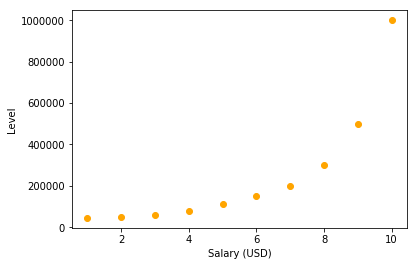

In [3]:
# visually investigating any relationship between the Salary and Level
_ = plt.plot(df.Level, df.Salary, marker='o', linestyle='none', c='orange')
_ = plt.xlabel('Salary (USD)')
_ = plt.ylabel('Level')

After seeing the data we can tell there is no linear relationship between the Level and their Salary fields. We can, however, see that there is *some* relationship there. We'll come back to that. That person at the last company did also say that the candidate we are considering did hold the position of "Region Manager" for a couple of years and it usually takes four years to become a "Partner." So, looking at the data, that means this person was kind of Level 6.5.

Armed with this information, we're all antsy in our pantsy because we know that we can build a regression model that can predict whether or not the $160k salary the candidate told us was a bluff! So, let's see how good their poker face is.

We will predict if this claim is TRUE or FALSE (a bluff) by building a polynomial regression model to predict salaries (Salary is our response), using the Position and Level as features. Honestly, we'll only really be using the Level field as our feature, since it is basically an encoding of the Position field.

## Prepare The Data

In [4]:
# separate the data into response and predictor (ensure X is a matrix, not a vector)
X = df.iloc[:,1:2].values
y = df.iloc[:,-1].values

At this point in the game we would usually want to split the data set into a training set and a test set. In this case, however, we only have 10 data points. This is not a whole lot of data tot rain the model, so it does not make a lot of sense to split the data. We also want the accuracy to be spot on and not miss the target. So as much information for the model as possible is required.

So we'll move right into feature scaling-- Wait, no, we won't. The polynomial regression consists of superimposing polynomial terms. Check the equation above. This means we can just use the same library as we would need for the linear regressions models. Let's just get down to business in building the model.

For comparison, we are going to build a linear regression model along with the polynomial regression model. If for nothing else, just to *see* how a rigid model stacks up to a more flexible model. We could go into more depth with the comparison, discussing the bias-variance trade-off, but that is beyond the scope of what we're doing here.

In [5]:
# fit the linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# fit the polynimial regression using PolynomialFeatures class from preprocessing sublibrary
from sklearn.preprocessing import PolynomialFeatures

# instantiate taking the independent variable to a power 1, 2, .., n (whatever degree we want)
poly_reg = PolynomialFeatures(degree=2)

# fit and transform our independent variable
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [7]:
# inspect the new variable
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


Yep, the values and the values squared.

In [8]:
# include the fit into a multiple linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The models have been made, so let's...

## Assess The Models

Was the person telling the truth, or bluffing?

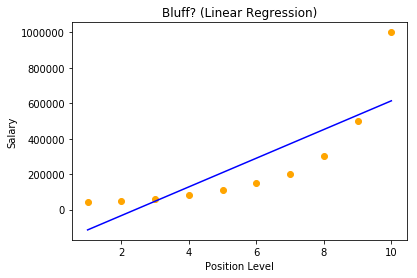

In [9]:
# plot the linear regression model
_ = plt.scatter(X, y, color='orange')
_ = plt.plot(X, lin_reg.predict(X), color='blue')
_ = plt.title('Bluff? (Linear Regression)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')

Yeah, it doesn't quite capture it, does it? It even looks like at Level 6.5, the candidate should probably have been making about $350k! Let's see our plynomial model predictions.

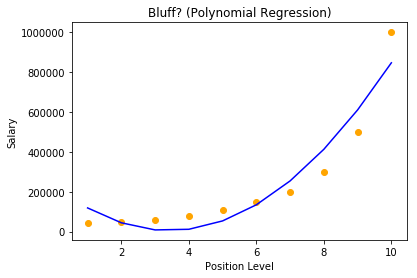

In [10]:
# plot the polynomial model
_ = plt.scatter(X,y, color='orange')

# don't use X_poly as it's predefined for an existing matrix of features, X
# We want this to be more general, to take whatever we give it, so we use poly_reg.fit_transform(X)
_ = plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
_ = plt.title('Bluff? (Polynomial Regression)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')

Hmm. Still doesn't seem to capture it all, though it is a better than last time. Let's add a degree and see what happens.

In [11]:
# instantiate with degree = 3 this time
poly_reg = PolynomialFeatures(degree=3)

# fit and transform our independent variable
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

# include the fit into a multiple linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

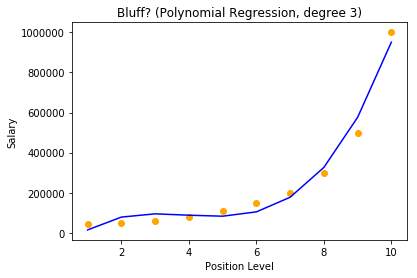

In [12]:
# plot the polynomial model, degree 3
_ = plt.scatter(X,y, color='orange')

# don't use X_poly as it's predefined for an existing matrix of features, X
# We want this to be more general, to take whatever we give it, so we use poly_reg.fit_transform(X)
_ = plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
_ = plt.title('Bluff? (Polynomial Regression, degree 3)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')

Better, but let's try degree 4.

In [13]:
# instantiate with degree = 4 this time
poly_reg = PolynomialFeatures(degree=4)

# fit and transform our independent variable
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

# include the fit into a multiple linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

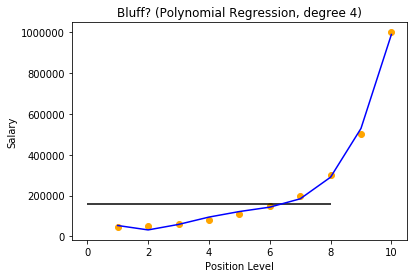

In [14]:
# plot the polynomial model, degree 4
_ = plt.scatter(X,y, color='orange')

# don't use X_poly as it's predefined for an existing matrix of features, X
# We want this to be more general, to take whatever we give it, so we use poly_reg.fit_transform(X)
_ = plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
_ = plt.title('Bluff? (Polynomial Regression, degree 4)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')
_ = plt.hlines(y=160000, xmin=0, xmax=8)

This actually looks really good. If we look at that horizontal line at $160k, it looks like, for that person's level, They may not have been bluffing. Let's spruce up the plot though to be double sure.

In [15]:
# Create an x-grid to get more precise with the Levels
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

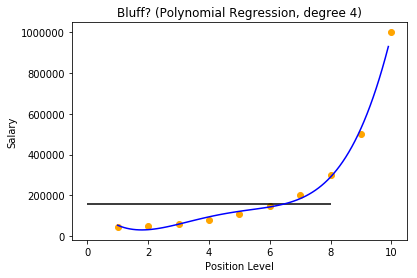

In [16]:
# plot the polynomial model, degree 4
_ = plt.scatter(X,y, color='orange')

# don't use X_poly as it's predefined for an existing matrix of features, X
# We want this to be more general, to take whatever we give it, so we use poly_reg.fit_transform(X)
_ = plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue')
_ = plt.title('Bluff? (Polynomial Regression, degree 4)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')
_ = plt.hlines(y=160000, xmin=0, xmax=8)

That's better, but let's make one final prediction and see where this person lands. In the previous predictions, we made predictions for *all* the salary data we received. But, we are really only concerned with *one* value: that of our candidate's. So let's use what we've built to predict *this person's* salary.

In [17]:
# predict new response with a linear regression model
print('$', np.round(float(lin_reg.predict(6.5)),2), ' salary for Level 6.5.')

$ 330378.79  salary for Level 6.5.


In [18]:
# predict new response with 4th degree polynomial regression model
print('$', np.round(float(lin_reg2.predict(poly_reg.fit_transform(6.5))),2), ' salary for Level 6.5.')

$ 158862.45  salary for Level 6.5.


### *Truth!*

The candidate was not bluffing. Let's make an offer!